In [15]:
import numpy as np
import matplotlib.pyplot as plt
import soundfile
from IPython.display import Audio
from scipy import signal
from biquadFilter import biquadFilter

/var/folders/vs/l1t_wf8n20580_20pnqg7hfr0000gn/T/ipykernel_20247/2923336469.py:11: RuntimeWarning: divide by zero encountered in log10
  x_dB[n] = 20 * np.log10(abs(x[n])) # convert to dB


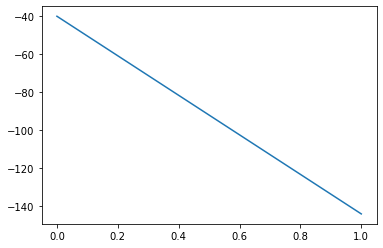

In [2]:
# LINEARAMPTODB
# This script demonstrates the process of converting the linear amplitude of a signal
# to a decibel scale. An additional step is included to prevent values of a negative
# infinity from happening.

x = np.arange(-1, 1) * 0.01 # Linear amplitude values over FS range
N = len(x)
x_dB = np.zeros(N)

for n in range(N):
    x_dB[n] = 20 * np.log10(abs(x[n])) # convert to dB
    if x_dB[n] < -144:  # Conditional to prevent values of negative infinity
        x_dB[n] = -144  # or anything below noise floor

plt.plot(x_dB)
plt.show()
# This plot shows the result of the initial block in the detection path converting
# a linear amplitude to a decibel amplitude.

/var/folders/vs/l1t_wf8n20580_20pnqg7hfr0000gn/T/ipykernel_20247/1271208403.py:16: RuntimeWarning: divide by zero encountered in log10
  x_dB[n] = 20 * np.log10(abs(x[n]))


Text(0, 0.5, 'Output Amplitude (dBFS)')

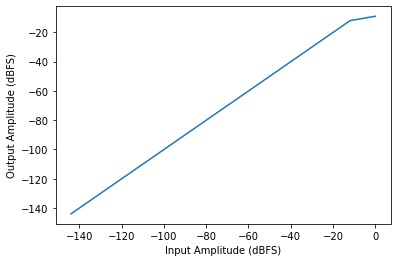

In [3]:
# STATICCHARACTERISTICS
# This script demonstrates how to use the static characteristics of a compressor as
# part of the detection path. At the end of the script, the characteristic curve is
# plotted for the static characteristics.

x = np.arange(0, 1000) * 0.001 # Simple input signal
N = len(x)
# Initialize static characteristics
T = -12 # Threshold (dBFS)
R = 4   # Ratio (4:1)

x_dB = np.zeros(N)
g_sc = np.zeros(N)

for n in range(N):
    x_dB[n] = 20 * np.log10(abs(x[n]))
    if x_dB[n] < -144:
        x_dB[n] = -144

    # Comparison to threshold
    if x_dB[n] > T:
        # Perform compression
        g_sc[n] = T + ((x_dB[n]- T)/R)
    else:
        # Do not compress
        g_sc[n] = x_dB[n]

plt.plot(x_dB, g_sc) # Compressor characteristic curve plot
plt.xlabel('Input Amplitude (dBFS)')
plt.ylabel('Output Amplitude (dBFS)')
plt.show()

/var/folders/vs/l1t_wf8n20580_20pnqg7hfr0000gn/T/ipykernel_20247/1976437783.py:17: RuntimeWarning: divide by zero encountered in log10
  x_dB[n] = 20 * np.log10(abs(x[n]))


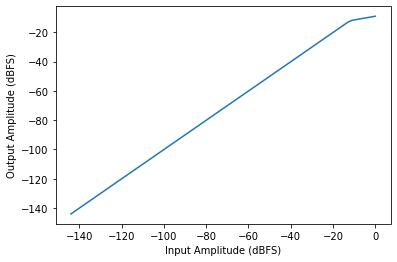

In [4]:
# SOFTKNEE
# This script demonstrates how to incorporate the knee parameter to create a
# soft-knee compressor. AT the end of the script, the characteristic curve is
# plotted for the static characteristic.

x = np.arange(0, 1000) * 0.001 # Simple input signal
N = len(x)
# Initialize static characteristics
T = -12 # Threshold (dBFS)
R = 4   # Ratio (4:1)
W = 4   # Knee width, 4 dB

x_dB = np.zeros(N)
g_sc = np.zeros(N)

for n in range(N):
    x_dB[n] = 20 * np.log10(abs(x[n]))
    if x_dB[n] < -144:
        x_dB[n] = -144

# Comparison to threshold
    if x_dB[n] > (T + W/2):
        # Above knee curve
        g_sc[n] = T + ((x_dB[n]- T)/R)
    elif x_dB[n] > (T - W/2):
        # Within knee curve
        g_sc[n] = x_dB[n] + ((1/R - 1) * pow((x_dB[n] - T + W/2), 2))/(2*W)
    else:
        # Do not compress
        g_sc[n] = x_dB[n]

plt.plot(x_dB, g_sc) # Compressor characteristic curve plot
plt.xlabel('Input Amplitude (dBFS)')
plt.ylabel('Output Amplitude (dBFS)')
plt.show()

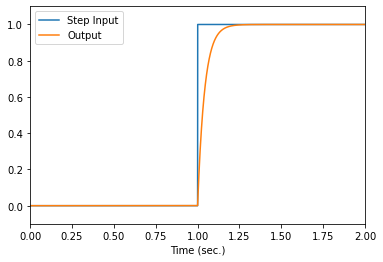

In [19]:
# STEPDEMO
# This script demonstrates the process of measuring the step response of a
# first-order, feedback LPF. A plot is created showing a comparison between the
# input step signal and the output response.

# Initialize the sampling rate
Fs = 48000
Ts = 1/Fs

# Create step input signal
x = np.append(np.zeros(Fs), np.ones(Fs))
N = len(x)

# Initialize gain value
alpha = 0.9995 # Also try values between 0.999-0.9999
q = 0 # Initialize feedback variable

y = np.zeros(N)

for n in range(N):
    y[n] = (1 - alpha) * x[n] + alpha * q
    q = y[n] # Stores the 'previous' value for the next loop cycle

t = np.arange(0, N) * Ts # time vector for plot
plt.plot(t, x, t, y)
plt.axis([0, 2, -0.1, 1.1])
plt.xlabel('Time (sec.)')
plt.legend(['Step Input', 'Output'])
plt.show()

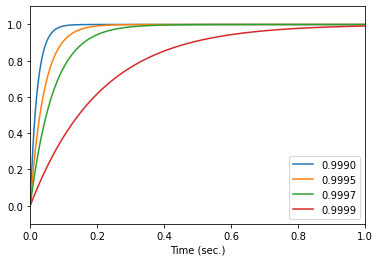

In [2]:
# STEPRESPONSE
# This script demonstrates the dstep(b,a) from the scipy library. The step response
# for several first-order systems is compared using different feedback gains.

Fs = 48000 # Initialize the sampling rate
sec = 1 # Time length in seconds
n = sec * Fs # Convert second to number or samples

# Define different gain values to test
gains = [0.9990, 0.9995, 0.9997, 0.9999]

# Determine new step response each time through the loop
for element in range(len(gains)):
    alpha = gains[element]
    b = (1-alpha)
    a = [1, -alpha]
    inst = signal.dlti(b, a, dt=1/Fs)
    t, h = signal.dstep(inst, n=n)
    plt.plot(t, np.squeeze(h))

plt.axis([0, sec, -0.1, 1.1])
plt.xlabel('Time (sec.)')
plt.legend(['0.9990', '0.9995', '0.9997', '0.9999'])
plt.show()

/var/folders/vs/l1t_wf8n20580_20pnqg7hfr0000gn/T/ipykernel_45223/2383256293.py:31: RuntimeWarning: divide by zero encountered in log10
  x_dB = 20 * np.log10(x_uni/1)


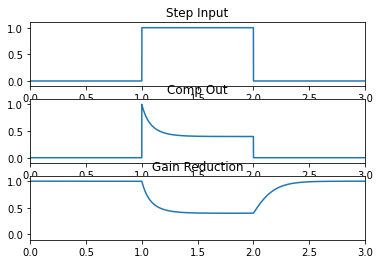

In [4]:
# BASICCOMP
# This script creates a dynamic range compressor with attack and release times
# linked together. A step input signal is synthesized for testing. A plot is produced
# at the end of the script to show a comparison of the input step signal, the output
# response, and the gain reduction curve.
#
# See also COMPRESSOR, COMPRESSOREXAMPLE

# Step input signal
Fs = 48000
Ts = 1/Fs
x = np.append(np.zeros(Fs), np.ones(Fs))
x = np.append(x, np.zeros(Fs))

N = len(x)
# Parameters for compressor
T = -12 # Threshold = -12 dBFS
R = 3 # Ratio = 3:1
responseTime = 0.25 # time in seconds
alpha = np.exp(-np.log(9)/(Fs * responseTime))
gainSmoothPrev = 0 # Initialize smoothing variable

y = np.zeros(N)
lin_A = np.zeros(N)

# Loop over each sample to see if it is above threshold
for n in range(N):
    ###### Calculations of the detection path
    # Turn the input signal into a unipolar signal on the dB scale
    x_uni = abs(x[n])
    x_dB = 20 * np.log10(x_uni/1)
    # Ensure there are no values of negative infinity
    if x_dB < - 96:
        x_dB = -96

    # Static characteristics
    if x_dB > T:
        gainSC = T + (x_dB - T)/R # Perform downwards compression

    else:
        gainSC = x_dB # Do not perform compression

    gainChange_dB = gainSC - x_dB

    # Smooth over the gainChange_dB to alter response time
    gainSmooth = ((1-alpha) * gainChange_dB) + (alpha * gainSmoothPrev)

    # Convert to linear amplitude scalar
    lin_A[n] = pow(10, gainSmooth/20)

    ###### Apply linear amplitude from detection path
    ###### to input sample.
    y[n] = lin_A[n] * x[n]

    # Update gainSmoothPrev used in the next sample of the loop
    gainSmoothPrev = gainSmooth

t = np.arange(0, N) * Ts

plt.subplot(3,1,1)
plt.plot(t, x)
plt.title('Step Input')
plt.axis([0, 3, -0.1, 1.1])

plt.subplot(3,1,2)
plt.plot(t, y)
plt.title('Comp Out')
plt.axis([0, 3, -0.1, 1.1])

plt.subplot(3,1,3)
plt.plot(t, lin_A)
plt.title('Gain Reduction')
plt.axis([0, 3, -0.1, 1.1])
plt.show()

# The 'gain reduction' line shows the amount of compression applied at each sample
# of the signal. When the value is '1', there is no compression. When the value is
# less than '1', gain reduction is happening.

In [13]:
# COMPRESSOR
# This function implements a dynamic range compressor with separate attack and
# release times. To visualize the results, code is included at the end of the
# function to plot the input signal and the compressed output signal. As a default,
# this code is commented so it does not create a plot each time the function
# is called.
#
# Input Variables
#   T: threshold relative to 0 dBFS
#   R: ratio (R to 1)
#   attackTime: units of seconds
#   releaseTime: units of seconds
#
# See also COMPRESSOREXAMPLE, BASICCOMP

def compressor(x, Fs, T, R, attackTime, releaseTime):
    N = len(x)
    y = np.zeros(N)
    lin_A = np.zeros(N)

    # Initialize separate attack and release times
    alphaA = np.exp(-np.log(9)/(Fs * attackTime))
    alphaR = np.exp(-np.log(9)/(Fs * releaseTime))

    gainSmoothPrev = 0 # Initialize smoothing variable

    # Loop over each sample to see if it is above thresh
    for n in range(N):
        # Turn the input signal into unipolar signal on the dB scale
        x_uni = abs(x[n])
        x_dB = 20 * np.log10(x_uni/1)
        # Ensure there are no values of negative infinity
        if x_dB < -96:
            x_dB = -96

        # Static characteristics
        if x_dB > T:
            gainSC = T + (x_dB - T)/R # Perform downwards compression
        else:
            gainSC = x_dB # Do not perform compression

        gainChange_dB = gainSC - x_dB

        # Smooth over the gainChange
        if gainChange_dB < gainSmoothPrev:
            # attack mode
            gainSmooth = ((1 - alphaA) * gainChange_dB) + (alphaA * gainSmoothPrev)

        else:
            # release
            gainSmooth = ((1 - alphaR) * gainChange_dB) + (alphaR * gainSmoothPrev)

        # Convert to linear amplitude scalar
        lin_A[n] = pow(10, gainSmooth/20)

        # Apply linear amplitude to input sample
        y[n] = lin_A[n] * x[n]

        # Update gainSmoothPrev used in the next sample of the loop
        gainSmoothPrev = gainSmooth

    # Uncomment for visualization
    t = np.arange(0, N)/Fs
    plt.subplot(2,1,1)
    plt.plot(t,x)
    plt.title('Input')
    plt.axis([0, t[-1], -1.1, 1.1])
    plt.subplot(2,1,2)
    plt.plot(t,y,t,lin_A)
    plt.title('Output')
    plt.axis([0, t[-1], -1.1, 1.1])
    plt.legend(['Output Signal', 'Gain Reduction'])
    plt.show()

    return y

/var/folders/vs/l1t_wf8n20580_20pnqg7hfr0000gn/T/ipykernel_45223/1548698365.py:31: RuntimeWarning: divide by zero encountered in log10
  x_dB = 20 * np.log10(x_uni/1)


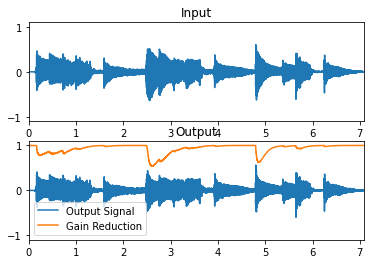

In [14]:
# COMPRESSOREXAMPLE
# This script creates a dynamic range compressor with separate attack and release
# times.
#
# See also COMPRESSOR, BASICCOMP

# Acoustic guitar 'audio' sound file
x, Fs = soundfile.read('AcGtr.wav')

# Parameters for compressor
T = -15 # Threshold = -15 dBFS
R = 10 # Ratio = 10:1

# Initialize separate attack and release times
attackTime = 0.05 # time in seconds
releaseTime = 0.25 # time in seconds

# Compressor function
out = compressor(x, Fs, T, R, attackTime, releaseTime)

Audio(out, rate=Fs)

/var/folders/vs/l1t_wf8n20580_20pnqg7hfr0000gn/T/ipykernel_45223/2487873515.py:35: RuntimeWarning: divide by zero encountered in log10
  y_dB = 20 * np.log10(y_uni/1)


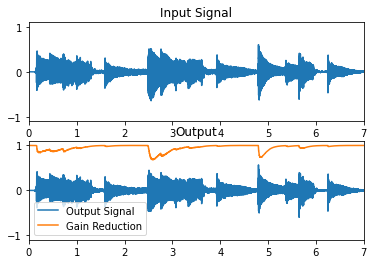

In [18]:
# FEEDBACKCOMP
# This script creates a feedback compressor. The processing of the detection path is
# similar to the feedforward compressor. The main difference is the output 'y' is
# analyzed in the detection path, not the input 'x'. A plot is produced at the end
# of the script to visualize the result.
#
# See also COMPRESSOR, BASICCOMP

# Acoustic guitar 'audio' sound file
x, Fs = soundfile.read('AcGtr.wav')

# Parameters for compressor
T = -15 # Threshold = -15 dBFS
R = 10 # Ratio = 10:1

# Initialize separate attack and release times
attackTime = 0.05 # time in seconds
alphaA = np.exp(-np.log(9)/(Fs * attackTime))
releaseTime = 0.25 # time in seconds
alphaR = np.exp(-np.log(9)/(Fs * releaseTime))

N = len(x)
y = np.zeros(N)
lin_A = np.zeros(N)

gainSmoothPrev = 0 # Initialize smoothing variable

y_prev = 0 # Initialize ouptut for feedback detection

# Loop over each sample to see if it is above threshold
for n in range(N):
    ###### Detection path based on the ouput signal, not 'x'
    # Turn the input signal into a unipolar signal on the dB scale
    y_uni = abs(y_prev)
    y_dB = 20 * np.log10(y_uni/1)

    # Ensure there are no values of negative infinity
    if y_dB < -96:
        y_dB = -96

    # Static characteristics
    if y_dB > T:
        gainSC = T + (y_dB - T)/R

    else:
        gainSC = y_dB # Do not perform compression

    gainChange_dB = gainSC - y_dB

    # smooth over the gainChange
    if gainChange_dB < gainSmoothPrev:
        # attack mode
        gainSmooth = ((1-alphaA) * gainChange_dB) + (alphaA * gainSmoothPrev)

    else:
        # release mode
        gainSmooth = ((1-alphaR) * gainChange_dB) + (alphaR * gainSmoothPrev)

    # Convert to linear amplitude scalar
    lin_A[n] = pow(10, gainSmooth/20)

    # Apply linear amplitude scalar
    y[n] = lin_A[n] * x[n]
    y_prev = y[n] # Update the next cycle

    # Update gainSmoothPrev used in the next sample of the loop
    gainSmoothPrev = gainSmooth

t = np.arange(0, N)/Fs

plt.subplot(2,1,1)
plt.plot(t,x)
plt.title('Input Signal')
plt.axis([0, 7, -1.1, 1.1])
plt.subplot(2,1,2)
plt.plot(t, y, t, lin_A)
plt.title('Output')
plt.axis([0, 7, -1.1, 1.1])
plt.legend(['Output Signal', 'Gain Reduction'])
plt.show()

In [3]:
# RMSCOMP
# This script creates a compressor with conventional RMS detection. The RMS value is
# calculated over a range of 'M' samples. Note: attack and release are linked
#
# See also COMPRESSOR, RMSCOMP2

# Acoustic guitar 'audio' sound file
x, Fs = soundfile.read('AcGtr.wav')

# Parameters for compressor
T = -20  # Threshold = -20 dBFS
R = 4  # Ratio = 4:1

# Initialize separate attack and release times
attackTime = 0.1  # time in seconds
alphaA = np.exp(-np.log(9)/(Fs * attackTime))
releaseTime = 0.25  # time in seconds
alphaR = np.exp(-np.log(9)/(Fs * releaseTime))

gainSmoothPrev = 0  # Initialize smoothing variable

M = 2048 # length of RMS calculation

# Initialize the first time window in a buffer
x_win = np.append(np.zeros(int(M/2)), x[0:int(M/2)])

N = len(x)
y = np.zeros(N)
lin_A = np.zeros(N)

# Loop over each sample to see if it is above threshold
for n in range(N):
    # Calculate the RMS for the current window
    x_rms = np.sqrt(np.mean(np.square(x_win)))

    # Turn the input signal into a unipolar signal on the dB scale
    x_dB = 20 * np.log10(x_rms)

    # Ensure there are no values of negative infinity
    if x_dB < -96:
        x_dB = -96

    # Static characteristics
    if x_dB > T:
        gainSC = T + (x_dB - T)/R  # Perform compression
    else:
        gainSC = x_dB  # Do not perform compression

    gainChange_dB = gainSC - x_dB

    # Convert to linear amplitude scalar
    lin_A[n] = pow(10, (gainChange_dB/20))

    # Apply linear amplitude to input sample
    y[n] = lin_A[n] * x[n]

    # Update the current time window
    if n + int(M/2) < N:
        x_win = x_win[1:]
        x_win = np.append(x_win, x[n+(int(M/2))])

    else:
        x_win = np.append(x_win[1:], 0)


t = np.arange(0, N)/Fs

plt.subplot(2,1,1)
plt.plot(t,x)
plt.title('Input Signal')
plt.axis([0, t[-1], -1.1, 1.1])
plt.subplot(2,1,2)
plt.plot(t, y, t, lin_A)
plt.title('Output')
plt.axis([0, t[-1], -1.1, 1.1])
plt.legend(['Output Signal', 'Gain Reduction'])
plt.show()

TypeError: 'float' object cannot be interpreted as an integer

/var/folders/vs/l1t_wf8n20580_20pnqg7hfr0000gn/T/ipykernel_55427/295667488.py:29: RuntimeWarning: divide by zero encountered in log10
  x_dB = 20 * np.log10(abs(x[n]))


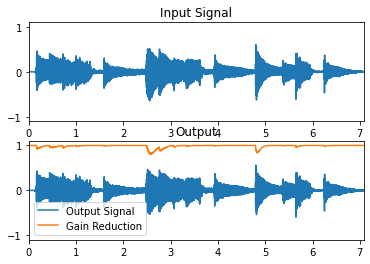

In [4]:
# RMSCOMP2
# This script creates a compressor with approximated RMS detection. The RMS value is
# estimated by using feedback. Separate attack and release times can be achieved.
#
# See also RMSCOMP

# Acoustic guitar 'audio' sound file
x, Fs = soundfile.read('AcGtr.wav')

# Parameters for compressor
T = -12  # Threshold = -12 dBFS
R = 4  # Ratio = 4:1

# Initialize separate attack and release times
attackTime = 0.1  # time in seconds
alphaA = np.exp(-np.log(9)/(Fs * attackTime))
releaseTime = 0.1  # time in seconds
alphaR = np.exp(-np.log(9)/(Fs * releaseTime))

gainSmoothPrev = 0  # Initialize smoothing variable

N = len(x)
y = np.zeros(N)
lin_A = np.zeros(N)

# Loop over each sample to see if it is above threshold
for n in range(N):
    # Turn the input signal into a unipolar signal on the dB scale
    x_dB = 20 * np.log10(abs(x[n]))

    # Ensure there are no values of negative infinity
    if x_dB < -96:
        x_dB = -96

    # Static characteristics
    if x_dB > T:
        gainSC = T + (x_dB - T)/R  # Perform downwards compression
    else:
        gainSC = x_dB  # Do not perform compression

    gainChange_dB = gainSC - x_dB

    # Smooth over gainChange
    if gainChange_dB < gainSmoothPrev:
        # attack mode
        gainSmooth = -np.sqrt(((1-alphaA) * pow(gainChange_dB, 2)) + pow(alphaA * gainSmoothPrev, 2))

    else:
        # release
        gainSmooth = -np.sqrt(((1-alphaR) * pow(gainChange_dB, 2)) + pow(alphaR * gainSmoothPrev, 2))

    # Convert to linear amplitude scalar
    lin_A[n] = pow(10, (gainSmooth/20))

    # Apply linear amplitude to input sample
    y[n] = lin_A[n] * x[n]

    # Update gainSmoothPrev used in the next sample of the loop
    gainSmoothPrev = gainSmooth


t = np.arange(0, N)/Fs

plt.subplot(2,1,1)
plt.plot(t,x)
plt.title('Input Signal')
plt.axis([0, t[-1], -1.1, 1.1])
plt.subplot(2,1,2)
plt.plot(t, y, t, lin_A)
plt.title('Output')
plt.axis([0, t[-1], -1.1, 1.1])
plt.legend(['Output Signal', 'Gain Reduction'])
plt.show()

/var/folders/vs/l1t_wf8n20580_20pnqg7hfr0000gn/T/ipykernel_56566/3569693949.py:33: RuntimeWarning: divide by zero encountered in log10
  sc_dB = 20 * np.log10(sc_uni/1)


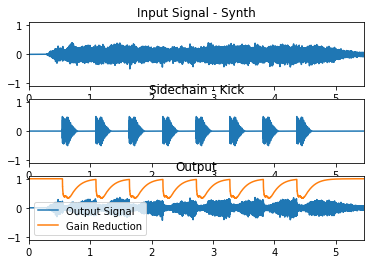

In [2]:
# SIDECHAINCOMP
# This script creates a side-chain compressor with a synthesizer signal and kick drum
# signal.
#
# See also COMPRESSOR

# Synthesizer input signal
x, Fs = soundfile.read('Synth.wav')
# Kick drum for the detection path
sc, _ = soundfile.read('Kick.wav')

# Parameters for compressor
T = -24 # Threshold = -24 dBFS
R = 10 # Ratio = 10:1

# Initialize separate attack and release times
attackTime = 0.05  # time in seconds
alphaA = np.exp(-np.log(9)/(Fs * attackTime))
releaseTime = 0.25  # time in seconds
alphaR = np.exp(-np.log(9)/(Fs * releaseTime))

gainSmoothPrev = 0  # Initialize smoothing variable

N = len(sc)
y = np.zeros(N)
lin_A = np.zeros(N)

# Loop over each sample to see if it is above threshold
for n in range(N):
    ##### Detection path based on the kick drum input signal
    # Turn the input signal into a unipolar signal on the dB scale
    sc_uni = abs(sc[n])
    sc_dB = 20 * np.log10(sc_uni/1)

    # Ensure there are no values of negative infinity
    if sc_dB < -96:
        sc_dB = -96

    # Static characteristics
    if sc_dB > T:
        gainSC = T + (sc_dB - T)/R  # Perform downwards compression
    else:
        gainSC = sc_dB  # Do not perform compression

    gainChange_dB = gainSC - sc_dB

    # Smooth over gainChange
    if gainChange_dB < gainSmoothPrev:
        # attack mode
        gainSmooth = -np.sqrt(((1-alphaA) * pow(gainChange_dB, 2)) + pow(alphaA * gainSmoothPrev, 2))

    else:
        # release
        gainSmooth = -np.sqrt(((1-alphaR) * pow(gainChange_dB, 2)) + pow(alphaR * gainSmoothPrev, 2))

    # Convert to linear amplitude scalar
    lin_A[n] = pow(10, (gainSmooth/20))

    # Apply linear amplitude to input sample
    y[n] = lin_A[n] * x[n]

    # Update gainSmoothPrev used in the next sample of the loop
    gainSmoothPrev = gainSmooth


t = np.arange(0, N)/Fs

plt.subplot(3,1,1)
plt.plot(t,x)
plt.title('Input Signal - Synth')
plt.axis([0, t[-1], -1.1, 1.1])
plt.subplot(3,1,2)
plt.plot(t, sc)
plt.title('Sidechain - Kick')
plt.axis([0, t[-1], -1.1, 1.1])
plt.subplot(3,1,3)
plt.plot(t, y, t, lin_A)
plt.title('Output')
plt.axis([0, t[-1], -1.1, 1.1])
plt.legend(['Output Signal', 'Gain Reduction'])
plt.show()

Audio(y, rate=Fs)

In [3]:
# EXPANDER
# This function implements an expander/gate DR processor. A similar approach is used for
# a compressor, except the static characteristics are calculated differently.
#
# Input Variables
#   T: threshold relative to 0 dBFS
#   R: ratio (R to 1)
#   attackTime: units of seconds
#   releaseTime: units of seconds
#
# See also EXPANDER, COMPRESSOREXAMPLE

def expander(x, Fs, T, R, attackTime, releaseTime):
    N = len(x)
    y = np.zeros(N)
    lin_A = np.zeros(N)

    # Calculate separate attack and release times
    alphaA = np.exp(-np.log(9)/(Fs * attackTime))
    alphaR = np.exp(-np.log(9)/(Fs * releaseTime))

    gainSmoothPrev = -144 # Initialize smoothing variable

    # Loop over each sample to see if it is below threshold
    for n in range(N):
        # Turn the input signal into a unipolar signal on the dB scale
        x_uni = abs(x[n])
        x_dB = 20 * np.log10(x_uni/1)

        # Ensure there are no values of negative infinity
        if x_dB < -144:
            x_dB = -144

        # Static characteristics
        if x_dB > T:
            gainSC = x_dB # Do not perform compression
        else:
            # Expander calculation
            gainSC = T + (x_dB - T) * R # Perform downwards expansion

            # Gating (use instead of expander)
            #gainSC = -144

        gainChange_dB = gainSC - x_dB

        # Smooth over gainChange
        if gainChange_dB > gainSmoothPrev:
            # attack mode
            gainSmooth = ((1-alphaA) * gainChange_dB) + (alphaA * gainSmoothPrev)

        else:
            # release
            gainSmooth = ((1-alphaR) * gainChange_dB) + (alphaR * gainSmoothPrev)

        # Convert to linear amplitude scalar
        lin_A[n] = pow(10, gainSmooth/20)

        # Apply linear amplitude to input sample
        y[n] = lin_A[n] * x[n]

        # Update gainSmoothPrev used in the next sample of the loop
        gainSmoothPrev = gainSmooth

    t = np.arange(0, N)/Fs

    plt.subplot(2,1,1)
    plt.plot(t,x)
    plt.title('Input Signal')
    plt.axis([0, t[-1], -1.1, 1.1])
    plt.subplot(2,1,2)
    plt.plot(t, y, t, lin_A)
    plt.title('Output')
    plt.axis([0, t[-1], -1.1, 1.1])
    plt.legend(['Output Signal', 'Gain Reduction'])
    plt.show()

    return y

/var/folders/vs/l1t_wf8n20580_20pnqg7hfr0000gn/T/ipykernel_56566/3241424071.py:28: RuntimeWarning: divide by zero encountered in log10
  x_dB = 20 * np.log10(x_uni/1)


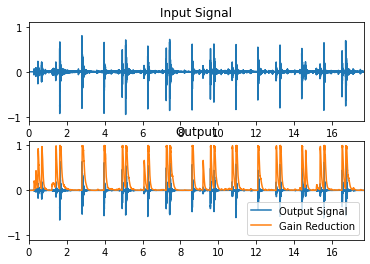

In [5]:
# EXPANDEREXAMPLE
# This script demonstrates an expander/gate DR processor
#
# See also EXPANDER, COMPRESSOREXAMPLE

# Drums sound file
x, Fs = soundfile.read('monoDrums.wav')

# Parameters for compressor
T = -20 # Threshold = -20 dBFS
R = 3 # Ratio = 3:1

# Initialize separate attack and release times
attackTime = 0.005 # time in seconds
releaseTime = 0.4 # time in seconds

out = expander(x, Fs, T, R, attackTime, releaseTime)
Audio(out, rate=Fs)
# Audio(x, rate=Fs) # For comparison

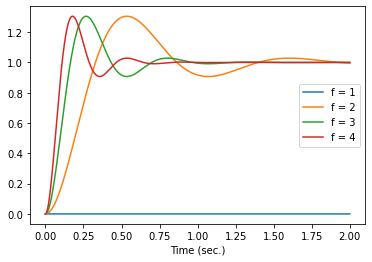

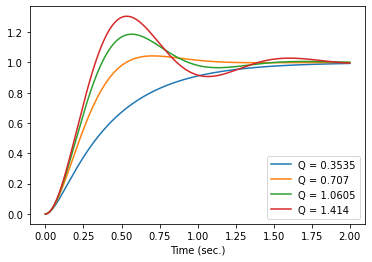

In [14]:
# BIQUADSTEP
# This script demonstrates the result of taking the step response of a bi-quad LPF.
# Examples include changing the cutoff frequency and Q.
#
# See also BIQUADFILTER

# Input signal
Fs = 48000
Ts = 1/Fs
x = np.ones(2 * Fs)
N = len(x)
t = np.arange(0, N) * Ts

# Changing the cutoff frequency
Q = 1.414
dBGain = Q
plt.figure(1)
for freq in range(4):
    y = biquadFilter(x, Fs, freq, Q, dBGain, 'lpf', 1)
    plt.plot(t,y)
plt.legend(['f = 1', 'f = 2', 'f = 3', 'f = 4'])
plt.xlabel('Time (sec.)')

# Changing the bandwidth Q
freq = 1
dbGain = 0
plt.figure(2)
Q = np.arange(1, 5)*(0.707/2)
for q in range(4):
    y = biquadFilter(x, Fs, freq, Q[q], dbGain, 'lpf', 1)
    plt.plot(t,y)
plt.legend(['Q = 0.3535', 'Q = 0.707', 'Q = 1.0605', 'Q = 1.414'])
plt.xlabel('Time (sec.)')
plt.show()

In [20]:
# STEPDESIGN
# This function can be used to design a second-order
# system with specified step response characteristics.
#
# Input Variables
#   Fs: sampling rate
#   OS: percent overshoot
#   T: time in seconds of "characteristic"
#   characteristic: 'pk' (peak) or 'ss' (settling time)

def stepDesign(Fs, OS, T, characteristic):
    if OS < 0.00001: # Ensure a minimum value of overshoot
        OS = 0.00001

    # Convert percent overshoot to damping
    L = -np.log(OS/100)/np.sqrt(pow(np.pi, 2) + (pow(np.log(OS/100), 2)))

    # Find 'wn' - undamped natural frequency
    # based on characteristic type
    if characteristic == 'pk':
        # Peak time
        wn = np.pi/(T * np.sqrt(1-pow(L, 2)))
    elif characteristic == 'st':
        # Setting time (0.02 of steady-state)
        wn = -np.log(0.02 * np.sqrt(1-pow(L, 2))) / (L * T)

    else:
        # Return invalid type
        print('Please enter a characteristic, "pk" - peak, "st" - settling time')
        return

    # Continuous Filter:
    #
    #                   (wn)^2
    # H(s) = -----------------------------
    #           s^2 + 2*L*wn + (wn)^2
    #

    num = pow(wn, 2)
    den = [1, 2*L*wn, pow(wn, 2)]

    # Perform bilinear transform on continuous system
    # to find discrete system
    b, a = signal.bilinear(num, den, Fs)

    # Plot the step response
    # n = 2 * Fs
    # inst = signal.dlti(b, a, dt=1/Fs)
    # t, h = signal.dstep(inst, n=n)
    # phi = np.arctan(L/np.sqrt(1-pow(L, 2)))
    # yStep = 1 - np.exp(-L*wn*t) * np.cos(wn * np.sqrt(1-pow(L,2) * t - phi) / (np.sqrt(1-pow(L,2)))
    # plt.plot(t, yStep)

    return b, a

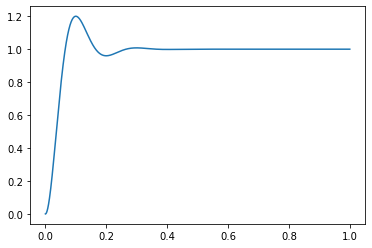

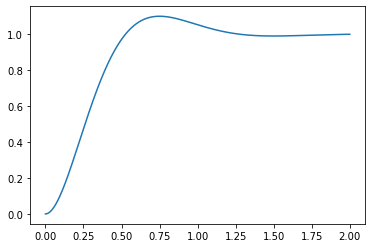

In [24]:
# STEPDESIGNEXAMPLE
# This script demonstrates the stepDesign function for designing a second-order system
# with specified characteristics. The system is designed based on the percent overshoot,
# settling time, and peak time.
#
# See also STEPDESIGN

Fs = 48000

# Example - filter design based on settling time
OS = 20 # Percent overshoot
# Settling time in seconds
ts = 0.25 # (within 2% of steady-state)

b, a = stepDesign(Fs, OS, ts, 'st')
n = 1 * Fs # number of seconds for step response
inst = signal.dlti(b, a, dt=1/Fs)
t, h = signal.dstep(inst, n=n)
plt.plot(t, np.squeeze(h))

plt.figure()

# Example - filter designed based on peak time
OS = 10 # Percent overshoot
tp = 0.75 # Peak time in seconds
b, a = stepDesign(Fs, OS, tp, 'pk')
n = 2 * Fs # number of seconds for step response
inst = signal.dlti(b, a, dt=1/Fs)
t, h = signal.dstep(inst, n=n)
plt.plot(t, np.squeeze(h))
plt.show()
